In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image, display
import os, sys
from matplotlib.image import imread

names = ['Banana', 'Gaussian_Gamma_1', 'GermanCredit', 'Brownian', 'ItemResponseTheory', 'StochasticVolatility']
names_long = ['Banana', 'Ill Conditioned Gaussian', 'Sparse Logistic Regression', 'Brownian Motion', 'Item Response Theory', 'Stochastic Volatility']

In [2]:
def pandas_matshow(df, x, y, z):

    # Pivot the DataFrame to create a grid
    pivot_table = df.pivot(index=y, columns=x, values=z)

    # Plotting the heatmap
    plt.imshow(pivot_table, cmap='viridis', aspect='auto')  # You can choose other colormaps
    plt.colorbar(label='grads to low bias')

    # Add labels
    plt.xticks(ticks=np.arange(len(pivot_table.columns)), labels=pivot_table.columns)
    plt.yticks(ticks=np.arange(len(pivot_table.index)), labels=pivot_table.index)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    

def pandas_show(df, x, y):
    plt.bar([str(val) for val in np.array(df[x])], np.array(df[y]))
    plt.ylabel('grads to low bias')
    plt.show()
    
def showw(*params):
    
    if len(params)==1:
        x = params[0]
        df = pd.read_csv('img/' + str(x) + '/data.csv', sep= '\t')

        for t in names:
            plt.title(t)
            pandas_show(df, x, 'grads_to_low_bmax_' + t)        
    
    elif len(params) == 2:
        x, y = params 
        df = pd.read_csv('img/' + str(x) + '_' + str(y) + '/data.csv', sep= '\t')

        for t in names:
            plt.title(t)
            pandas_matshow(df, x, y, 'grads_to_low_bmax_' + t)
    else:
        raise ValueError(f'{len(params)} is not implemented.')
    


In [ ]:
{'grads_to_low_bmax_Banana': 18, 'grads_to_low_bavg_Banana': 18, 
 'grads_to_low_bmax_Gaussian_Gamma_1': 312, 'grads_to_low_bavg_Gaussian_Gamma_1': 282, 
 'grads_to_low_bmax_GermanCredit': 410, 'grads_to_low_bavg_GermanCredit': 89, 
 'grads_to_low_bmax_Brownian': 208, 'grads_to_low_bavg_Brownian': 79, 
 'grads_to_low_bmax_ItemResponseTheory': 198, 'grads_to_low_bavg_ItemResponseTheory': 86, 
 'grads_to_low_bmax_StochasticVolatility': 1325, 'grads_to_low_bavg_StochasticVolatility': 788}


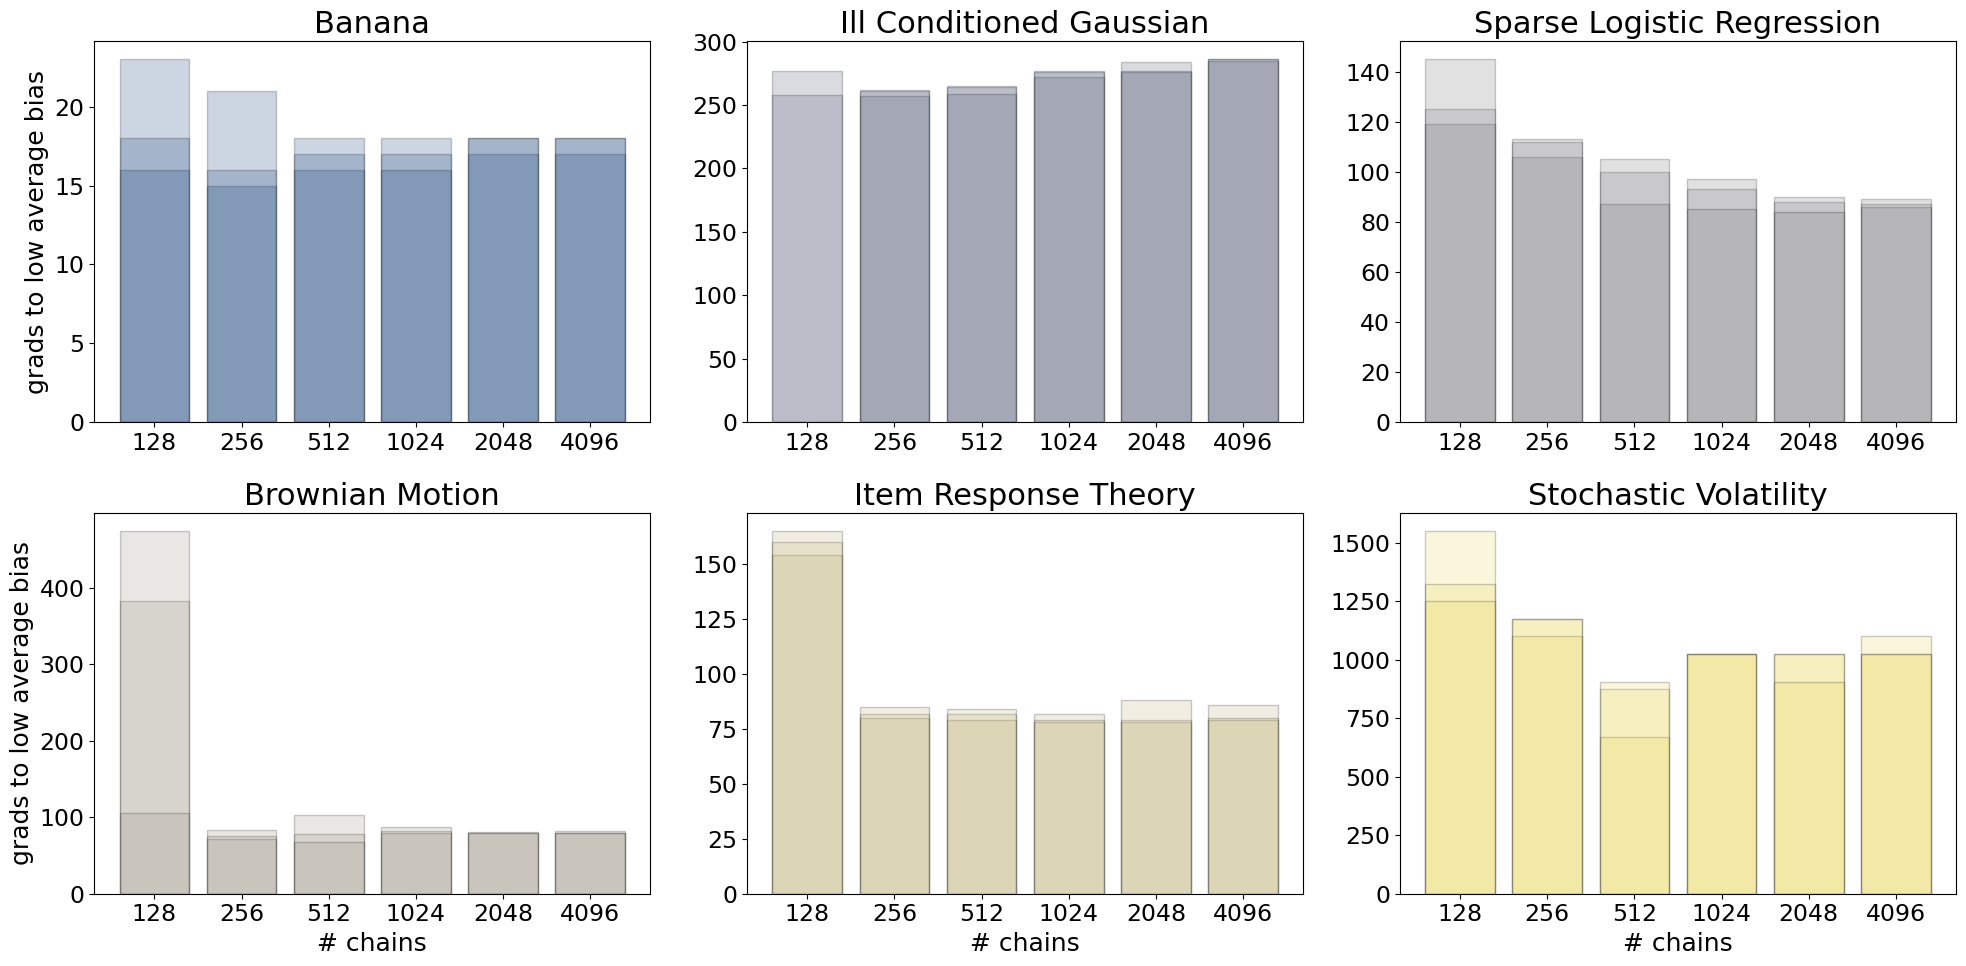

In [32]:
df = [pd.read_csv('img/chains/data'+str(i)+'.csv', sep= '\t') for i in range(3)]

bias = 'bavg'
plt.rcParams['xtick.labelsize'] = 17
plt.rcParams['ytick.labelsize'] = 17
plt.rcParams['font.size'] = 18

plt.figure(figsize= (20, 10))

for it in range(len(names)):
    color = plt.cm.cividis((0.5 + it) / len(names))
    plt.subplot(2, 3, it+1)
    plt.title(names_long[it], fontsize = 22)
    for i in range(3):
        plt.bar([str(val) for val in np.array(df[i]['chains'])][1:], np.array(df[i]['grads_to_low_'+bias+'_' + names[it]])[1:], alpha = 0.2, color = color, edgecolor = 'black', linewidth= 1)
    
    if it % 3 == 0:
        plt.ylabel('grads to low average bias')
        
    if it > 2:
        plt.xlabel('# chains')
        

plt.tight_layout()
plt.savefig('submission/chains.png')
plt.show()

In [5]:
df[0]

,chains,alpha,bias_type,C,power,early_stop,r_end,diagonal_preconditioning,integrator,steps_per_sample,...,grads_to_low_bmax_Gaussian_Gamma_1,grads_to_low_bavg_Gaussian_Gamma_1,grads_to_low_bmax_GermanCredit,grads_to_low_bavg_GermanCredit,grads_to_low_bmax_Brownian,grads_to_low_bavg_Brownian,grads_to_low_bmax_ItemResponseTheory,grads_to_low_bavg_ItemResponseTheory,grads_to_low_bmax_StochasticVolatility,grads_to_low_bavg_StochasticVolatility
0,64,1.9,3,0.1,0.375,1,0.005,1,0,15,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
1,128,1.9,3,0.1,0.375,1,0.005,1,0,15,...,inf,277.0,inf,119.0,inf,383.0,inf,154.0,inf,1550.0
2,256,1.9,3,0.1,0.375,1,0.005,1,0,15,...,inf,252.0,inf,106.0,920.0,70.0,inf,80.0,inf,1175.0
3,512,1.9,3,0.1,0.375,1,0.005,1,0,15,...,297.0,264.0,860.0,100.0,226.0,88.0,inf,80.0,inf,875.0
4,1024,1.9,3,0.1,0.375,1,0.005,1,0,15,...,299.0,275.0,620.0,97.0,268.0,76.0,363.0,78.0,3425.0,1025.0
5,2048,1.9,3,0.1,0.375,1,0.005,1,0,15,...,299.0,277.0,590.0,94.0,inf,79.0,173.0,78.0,2000.0,1025.0
6,4096,1.9,3,0.1,0.375,1,0.005,1,0,15,...,310.0,287.0,438.0,87.0,210.0,81.0,180.0,80.0,1925.0,1100.0


In [33]:
DF = pd.DataFrame([[dff[dff['chains']==256]['grads_to_low_bavg_' + t].item() for t in names] for dff in df] , columns = names).median(axis = 0)
display(DF / 100.)
display(DF * (256./100.))

Banana                   0.16
Gaussian_Gamma_1         2.61
GermanCredit             1.12
Brownian                 0.76
ItemResponseTheory       0.82
StochasticVolatility    11.75
dtype: float64

Banana                    40.96
Gaussian_Gamma_1         668.16
GermanCredit             286.72
Brownian                 194.56
ItemResponseTheory       209.92
StochasticVolatility    3008.00
dtype: float64